De modo que cada observación representa una muestra separada de vino y tiene información acerca de la composición química de dicho vino. Evidentemente algún conocimiento de vino suele ser necesario para poder trabajar bien en datas etc. Sin embargo vamos a suponer que tenemos aquí a un experto en vinos y ese mismo experto ha analizado diversas muestras de varios vinos para crear el Data.

En cada columna del mismo tiene información acerca de la composición de un químico en particular. También hay una columna llamada Quality calidad que basado en todos los aspectos que conoce el profesional del vino le da una valoración al mismo por lo tanto fijaros que tiene que ser importante todo tanto la composición química como al final el somelier la nota que le da al vino.

Y todo esto normalmente suele influir en lo que es el precio del vino. 

**Sin embargo** como esta puede ser un poco subjetiva y evidentemente se necesita un proceso lógico para establecer el precio del vino más allá de lo que diga un cierto experto. Un enfoque podría ser llevar a cabo un clúster basándonos en sus composiciones químicas y en la calidad y luego poner un precio similar a los clusters o a los vinos que pertenecen al mismo clúster basados en unos fundamentos estadísticos matemáticos más correctos. Qué sería de este caso el llevar a cabo un claustering completo.

## Paso 1: Importar el dataset

In [2]:
import pandas as pd

In [13]:
df = pd.read_csv('../../datasets/wine/winequality-red.csv', sep=';')
df.shape

(1599, 12)

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
import matplotlib.pyplot as plt

(array([ 10.,   0.,  53.,   0., 681.,   0., 638.,   0., 199.,  18.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <BarContainer object of 10 artists>)

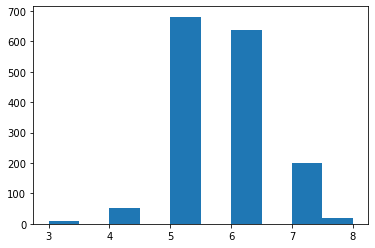

In [5]:
plt.hist(df['quality']) # La mayoría del vino es bueno

In [6]:
df.groupby('quality').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


De la calidad 3 a la 8 el promedio de cada uno de los compuestos podemos ver que **por ejemplo 'chlorides' entre mayores, peor es la calidad del vino**

## Paso 2: Normalización de los datos

In [7]:
df_norm = (df - df.min())/(df.max() - df.min())
df_norm.head() # Todo el data set ha sido normalizado

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.4
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.4
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.6
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4


## Clustering jerárquico con scikit-learn

In [7]:
from sklearn.cluster import AgglomerativeClustering 

In [9]:
# Linkage -> Metodo de enlace
clus = AgglomerativeClustering(n_clusters = 6, linkage="ward" ).fit(df_norm)

Text(0, 0.5, 'Número de Vinos del cluster')

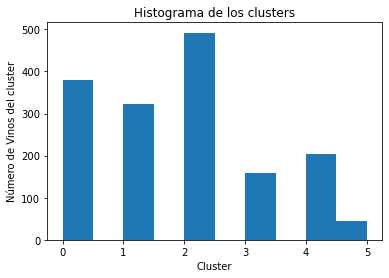

In [10]:
md_h = pd.Series(clus.labels_)
plt.hist(md_h)
plt.title('Histograma de los clusters')
plt.xlabel('Cluster')
plt.ylabel('Número de Vinos del cluster')

In [11]:
clus.children_

array([[   0,    4],
       [ 135,  140],
       [ 750,  751],
       ...,
       [3179, 3191],
       [3192, 3193],
       [3194, 3195]], dtype=int64)

In [8]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [13]:
Z = linkage(df_norm, "ward")

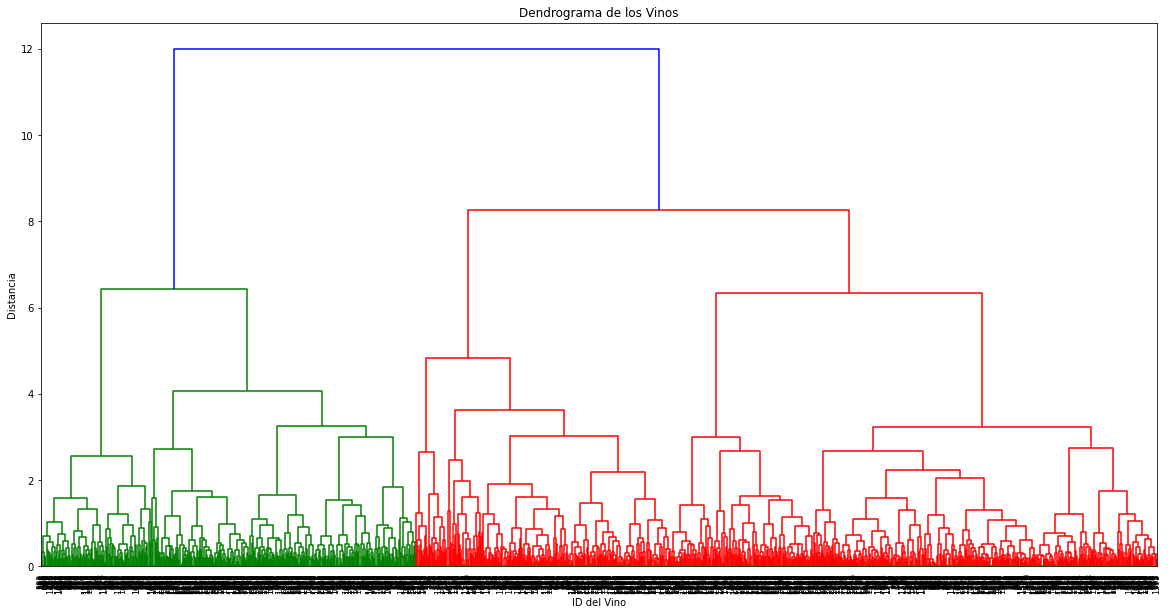

In [14]:
plt.figure(figsize=(20,10))
plt.title("Dendrograma de los Vinos")
plt.xlabel("ID del Vino")
plt.ylabel("Distancia")
dendrogram(Z, leaf_rotation=90., leaf_font_size=8.)
plt.show()

# K Means

In [9]:
from sklearn.cluster import KMeans
from sklearn import datasets

In [16]:
model = KMeans(n_clusters=6)
model.fit(df_norm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [17]:
model.labels_ # A que cluster pertenecen cada uno de los vino

array([5, 5, 5, ..., 4, 5, 0])

In [18]:
md_k = pd.Series(model.labels_)

In [19]:
# Agragamos columnas
df_norm["clust_h"] = md_h
df_norm["clus_k"] = md_k

In [20]:
df_norm.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,clust_h,clus_k
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4,2,5
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.4,2,5
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.4,2,5
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.6,3,2
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4,2,5


(array([235.,   0., 293.,   0., 224.,   0., 267.,   0., 216., 364.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

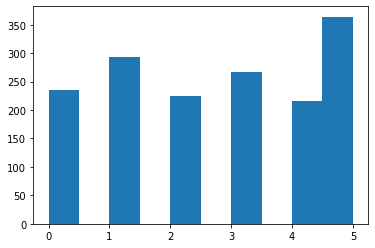

In [21]:
plt.hist(md_k)

In [22]:
model.cluster_centers_

array([[0.36998682, 0.15542116, 0.4326383 , 0.10652871, 0.10547366,
        0.16553791, 0.08393354, 0.40576124, 0.41236388, 0.24008154,
        0.50271686, 0.71404255],
       [0.33163188, 0.28188555, 0.278157  , 0.08742812, 0.1364333 ,
        0.13945104, 0.13187569, 0.52028988, 0.41415173, 0.18425947,
        0.20750853, 0.47713311],
       [0.59106353, 0.20372126, 0.544375  , 0.13707803, 0.16899446,
        0.14662978, 0.09718892, 0.65833464, 0.31742126, 0.25050791,
        0.29613095, 0.55357143],
       [0.31871665, 0.27605048, 0.30861423, 0.16399877, 0.12828497,
        0.4094266 , 0.31238337, 0.54094001, 0.43000383, 0.19199803,
        0.22032075, 0.45543071],
       [0.17551622, 0.31760528, 0.09634259, 0.09370244, 0.09543684,
        0.24771779, 0.12411661, 0.31965859, 0.57706328, 0.18743069,
        0.49824311, 0.61759259],
       [0.23852475, 0.38348638, 0.0685989 , 0.09367944, 0.12080115,
        0.16365501, 0.10522075, 0.48105767, 0.52267024, 0.15364875,
        0.23608763,

In [23]:
model.inertia_ # Suma del cuadrado de los errores

188.53428559504957

In [24]:
## Interpretación

In [25]:
df_norm.groupby('clus_k').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,clust_h
clus_k,,,,,,,,,,,,,
0,0.369987,0.155421,0.432638,0.106529,0.105474,0.165538,0.083934,0.405761,0.412364,0.240082,0.502717,0.714043,0.080851
1,0.331632,0.281886,0.278157,0.087428,0.136433,0.139451,0.131876,0.520290,0.414152,0.184259,0.207509,0.477133,1.563140
2,0.591064,0.203721,0.544375,0.137078,0.168994,0.146630,0.097189,0.658335,0.317421,0.250508,0.296131,0.553571,2.433036
3,0.318717,0.276050,0.308614,0.163999,0.128285,0.409427,0.312383,0.540940,0.430004,0.191998,0.220321,0.455431,1.056180
4,0.175516,0.317605,0.096343,0.093702,0.095437,0.247718,0.124117,0.319659,0.577063,0.187431,0.498243,0.617593,3.412037
5,0.238525,0.383486,0.068599,0.093679,0.120801,0.163655,0.105221,0.481058,0.522670,0.153649,0.236088,0.429670,2.129121


In [26]:
# Influye nivel de acido citrico, acido ajustado, y el azucar residual

# Complemento de estudio del ejercicio

In [12]:
import matplotlib.pyplot as plt

# for basic mathematics operation 
from pandas import plotting

# for visualizations
import seaborn as sns # Raiwnbow Hist plot
plt.style.use('fivethirtyeight')

# for interactive visualizations
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected = True)
import plotly.figure_factory as ff # Crear tablas dinamicas

## Tabla dinamica con figura_factory

In [14]:
dat = ff.create_table(df.head()) # Crear Tablas
py.iplot(dat) # Mostrar tablas

In [15]:
desc = ff.create_table(df.describe())
py.iplot(desc)

## Curvas de Andrews

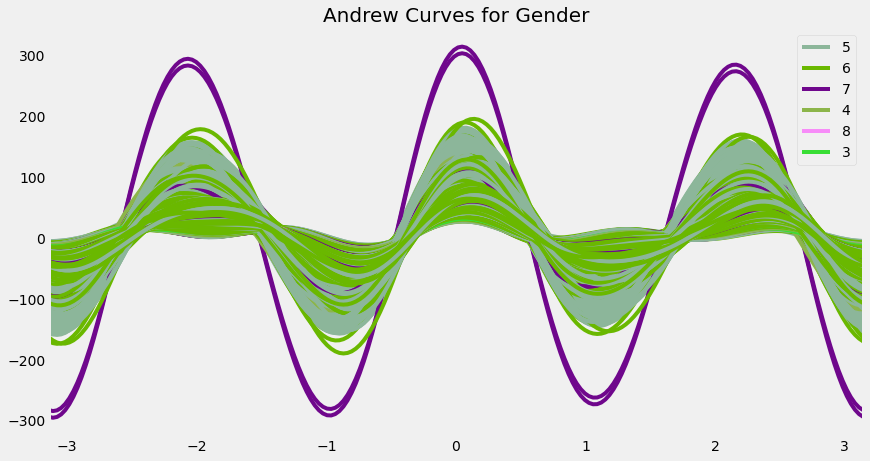

In [16]:
plt.rcParams['figure.figsize'] = (13, 7)


plotting.andrews_curves(df, "quality")
plt.title('Andrew Curves for Gender', fontsize = 20)
plt.show()

* Se ha demostrado que las curvas de Andrews pueden preservar medias, distancias (hasta una constante) y variaciones. Lo que significa que las curvas de Andrews que están representadas por funciones cercanas entre sí sugieren que los puntos de datos correspondientes también estarán juntos

## Histogramas & Distribución de los datos

In [31]:
df.columns.values

array(['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'], dtype=object)

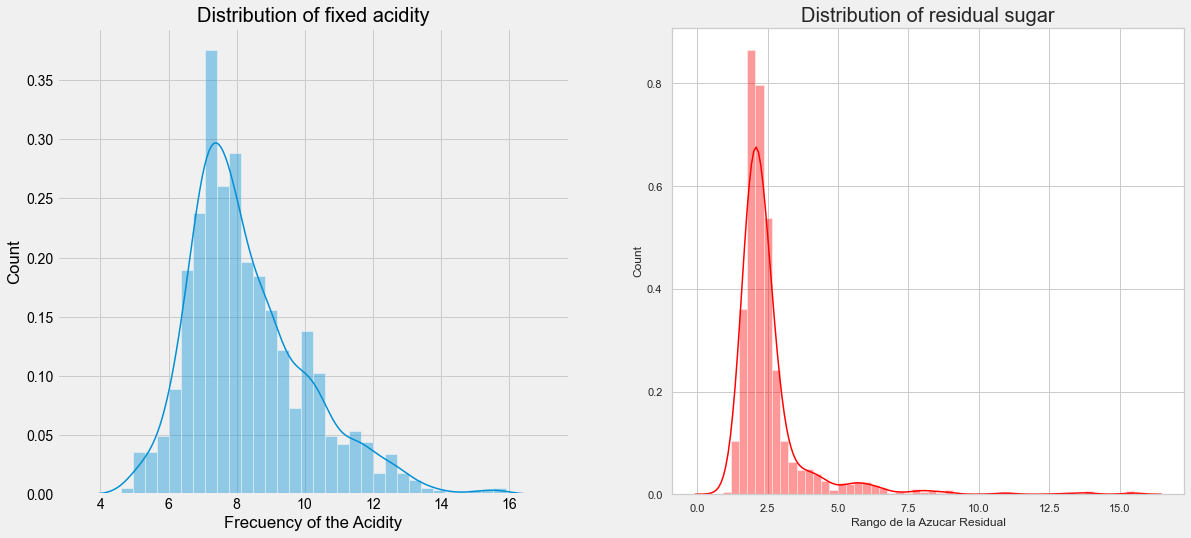

In [17]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (18, 8) # Tamaño del plot

plt.subplot(1, 2, 1) # Subplot dimensiones
sns.set(style = 'whitegrid') # Estilo
sns.distplot(df['fixed acidity']) # Distribución a mostrar
plt.title('Distribution of fixed acidity', fontsize = 20) # Titulo
plt.xlabel('Frecuency of the Acidity')
plt.ylabel('Count')


plt.subplot(1, 2, 2)
sns.set(style = 'whitegrid')
sns.distplot(df['residual sugar'], color = 'red')
plt.title('Distribution of residual sugar', fontsize = 20)
plt.xlabel('Rango de la Azucar Residual')
plt.ylabel('Count')
plt.show()

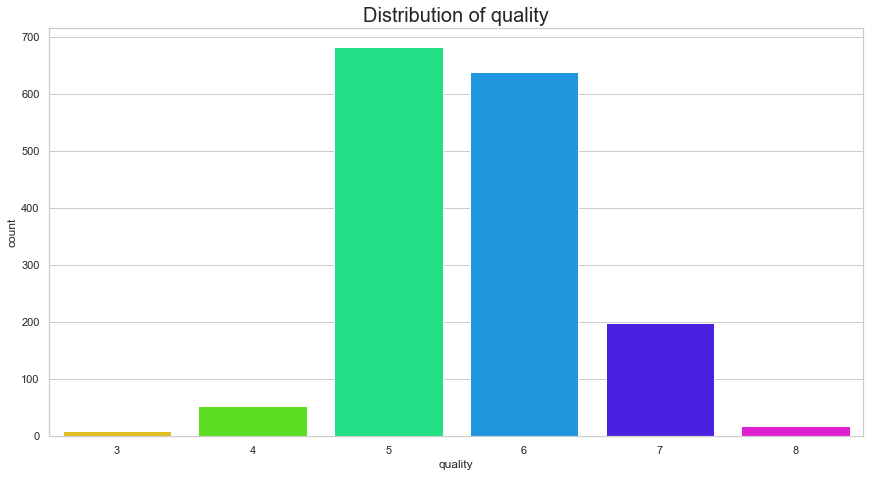

In [41]:
plt.rcParams['figure.figsize'] = (13, 7)
sns.countplot(df['quality'], palette = 'hsv')
plt.title('Distribution of quality', fontsize = 20)
plt.show()

In [34]:
df_plot = df[['chlorides','sulphates', 'alcohol']]

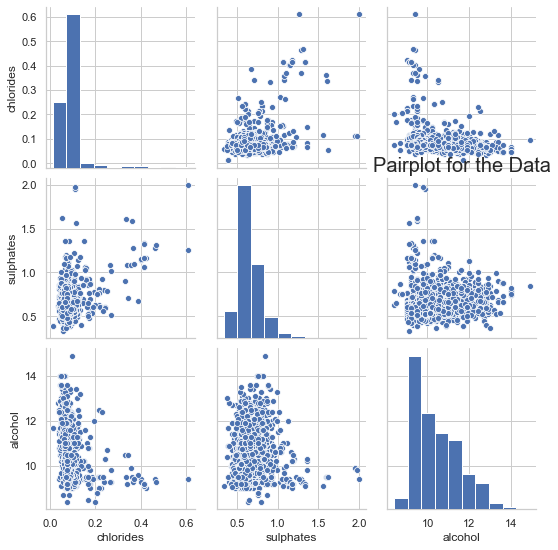

In [35]:
sns.pairplot(df_plot)
plt.title('Pairplot for the Data', fontsize = 20)
plt.show()

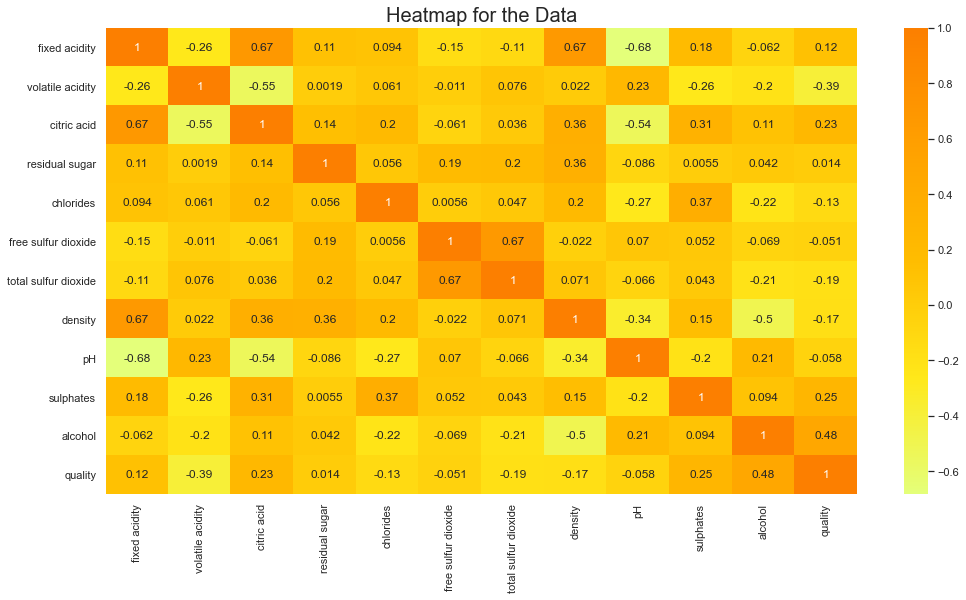

In [36]:
plt.rcParams['figure.figsize'] = (15, 8)
sns.heatmap(df.corr(), cmap = 'Wistia', annot = True)
plt.title('Heatmap for the Data', fontsize = 20)
plt.show()

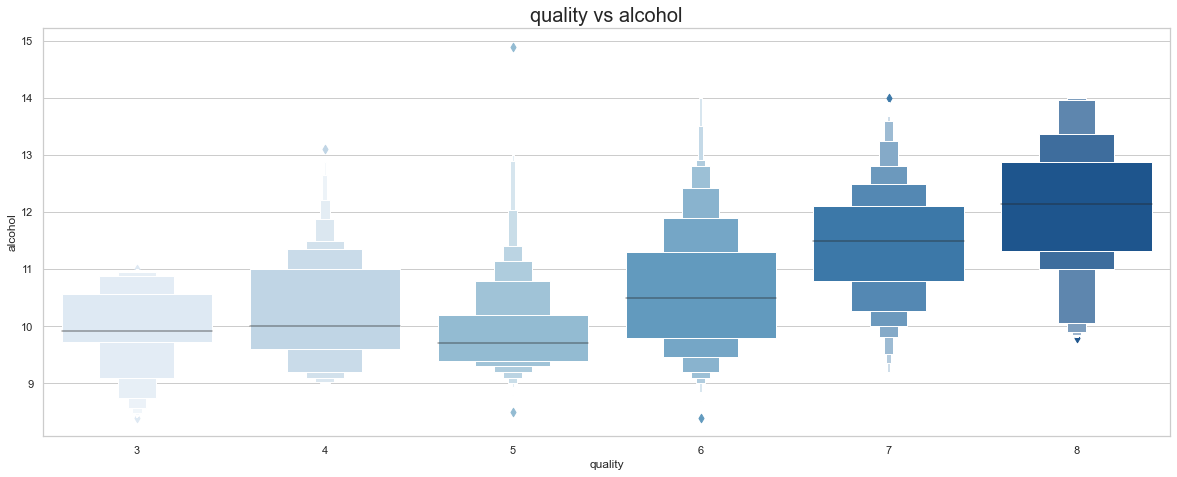

In [38]:
plt.rcParams['figure.figsize'] = (18, 7)
sns.boxenplot(df['quality'], df['alcohol'], palette = 'Blues')
plt.title('quality vs alcohol', fontsize = 20)
plt.show()

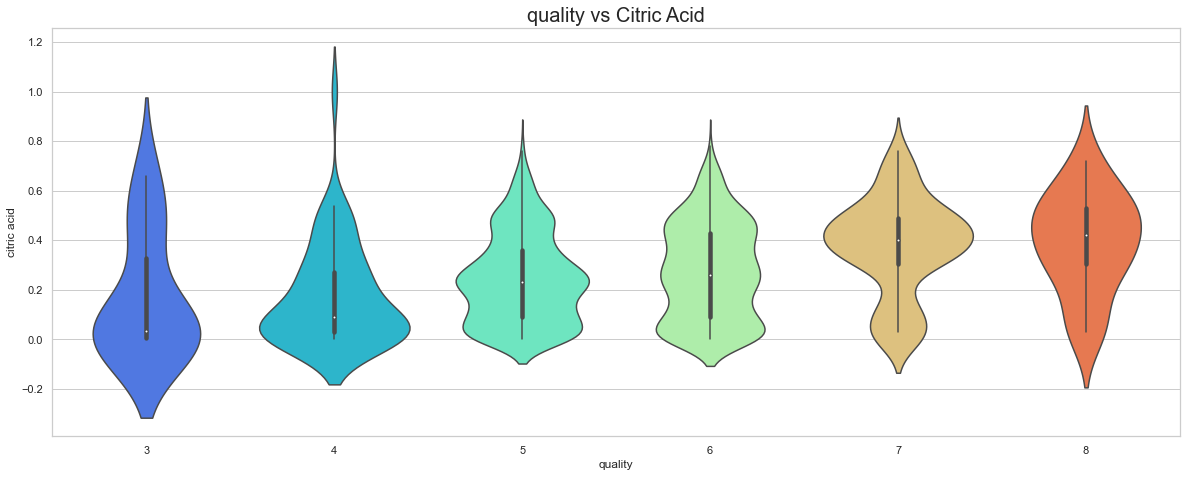

In [39]:
plt.rcParams['figure.figsize'] = (18, 7)
sns.violinplot(df['quality'], df['citric acid'], palette = 'rainbow')
plt.title('quality vs Citric Acid', fontsize = 20)
plt.show()

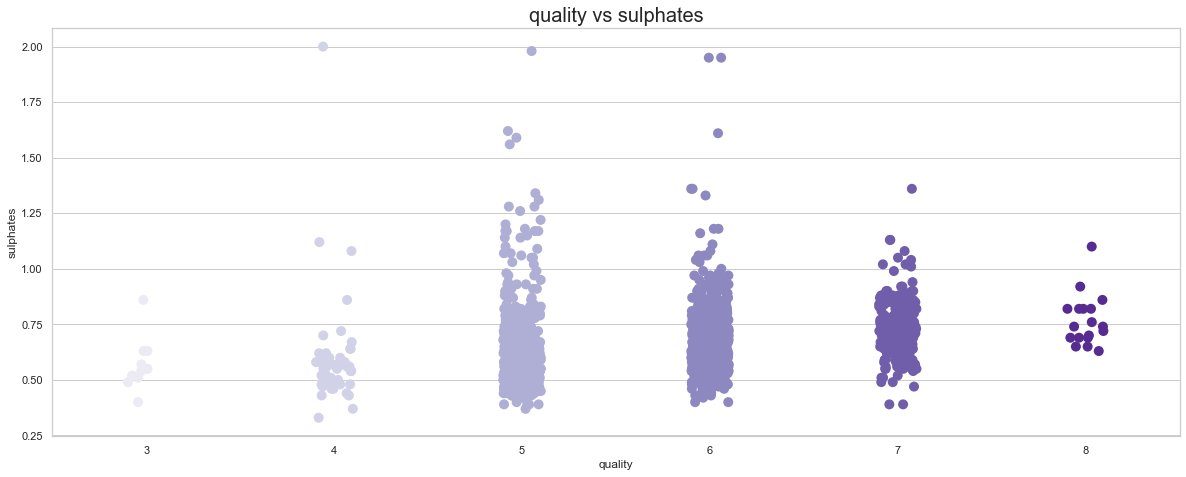

In [40]:
plt.rcParams['figure.figsize'] = (18, 7)
sns.stripplot(df['quality'], df['sulphates'], palette = 'Purples', size = 10)
plt.title('quality vs sulphates', fontsize = 20)
plt.show()

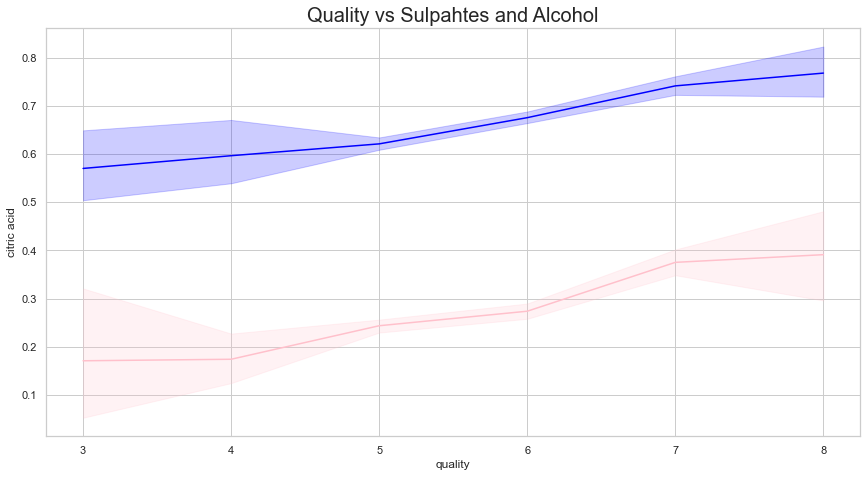

In [49]:
x = df['quality']
y = df['sulphates']
z = df['citric acid']

sns.lineplot(x, y, color = 'blue')
sns.lineplot(x, z, color = 'pink')
plt.title('Quality vs Sulpahtes and Alcohol', fontsize = 20)
plt.show()

In [52]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


## Clusterización de Calidad & Alcohol

In [56]:
df.iloc[:, [10, 11]]  # Asi obtenemos las dos columnas del df

,alcohol,quality
0,9.4,5
1,9.8,5
2,9.8,5
3,9.8,6
4,9.4,5
...,...,...
1594,10.5,5
1595,11.2,6
1596,11.0,6
1597,10.2,5


In [58]:
x = df.iloc[:, [10,11]].values

# let's check the shape of x
x.shape

(1599, 2)

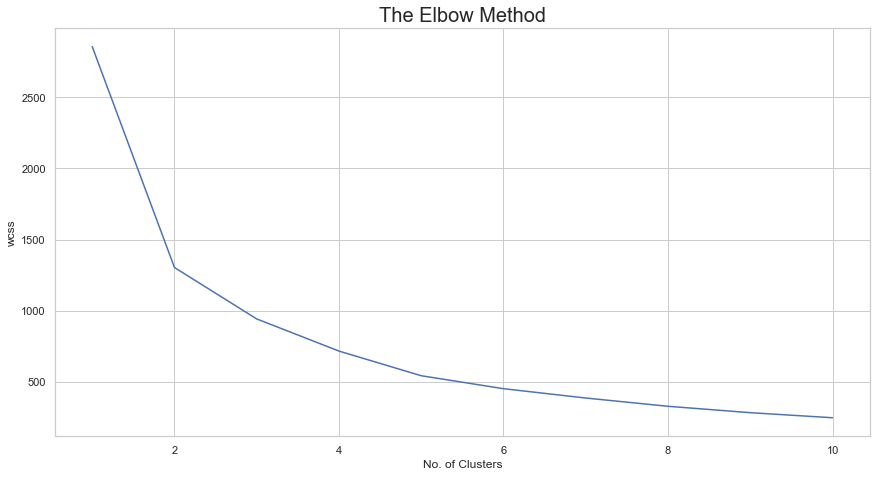

In [59]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x)
    wcss.append(km.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

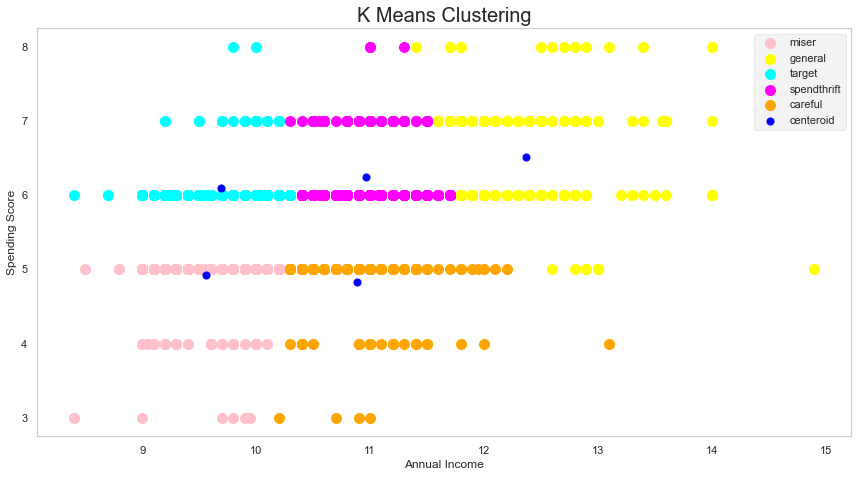

In [60]:
km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'pink', label = 'miser')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'yellow', label = 'general')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'cyan', label = 'target')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 100, c = 'magenta', label = 'spendthrift')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 100, c = 'orange', label = 'careful')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.style.use('fivethirtyeight')
plt.title('K Means Clustering', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()

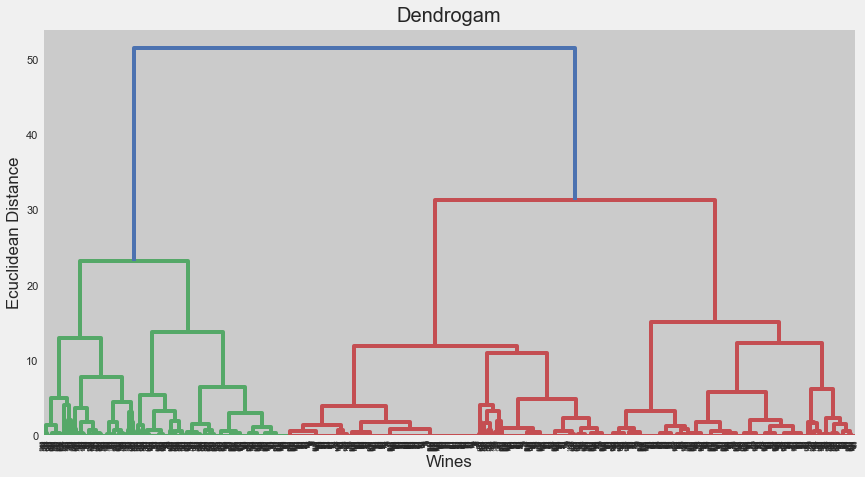

In [62]:
import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(x, method = 'ward'))
plt.title('Dendrogam', fontsize = 20)
plt.xlabel('Wines')
plt.ylabel('Ecuclidean Distance')
plt.show()

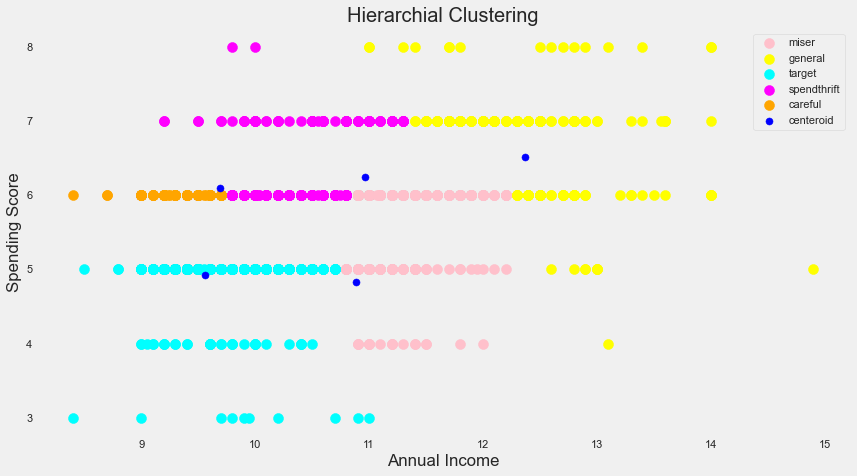

In [63]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(x)

plt.scatter(x[y_hc == 0, 0], x[y_hc == 0, 1], s = 100, c = 'pink', label = 'miser')
plt.scatter(x[y_hc == 1, 0], x[y_hc == 1, 1], s = 100, c = 'yellow', label = 'general')
plt.scatter(x[y_hc == 2, 0], x[y_hc == 2, 1], s = 100, c = 'cyan', label = 'target')
plt.scatter(x[y_hc == 3, 0], x[y_hc == 3, 1], s = 100, c = 'magenta', label = 'spendthrift')
plt.scatter(x[y_hc == 4, 0], x[y_hc == 4, 1], s = 100, c = 'orange', label = 'careful')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.style.use('fivethirtyeight')
plt.title('Hierarchial Clustering', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()

In [70]:
x = df[['quality', 'alcohol', 'pH']].values
km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
km.fit(x)
labels = km.labels_
centroids = km.cluster_centers_

df['labels'] =  labels
trace1 = go.Scatter3d(
    x= df['quality'],
    y= df['alcohol'],
    z= df['pH'],
    mode='markers',
     marker=dict(
        color = df['labels'], 
        size= 10,
        line=dict(
            color= df['labels'],
            width= 12
        ),
        opacity=0.8
     )
)
df_ = [trace1]

layout = go.Layout(
    title = 'Character vs Gender vs Alive or not',
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0  
    ),
    scene = dict(
            xaxis = dict(title  = 'quality'),
            yaxis = dict(title  = 'alcohol'),
            zaxis = dict(title  = 'pH')
        )
)

fig = go.Figure(data = df_, layout = layout)
py.iplot(fig)